### 导入库

In [1]:
import numpy as np
import pandas as pd

In [7]:
pd.set_option('display.max_columns', 100)

### 导入excel

In [12]:
with pd.ExcelFile(r'C:\百度云同步盘\小鸡理财\数据报告\月报\7月\7月.xlsx') as xlsx:
    df_tz = pd.read_excel(xlsx,'投资')
#     df_zc = pd.read_excel(xlsx,'注册')
#     df_yj = pd.read_excel(xlsx,'佣金')
#     df_vip = pd.read_excel(xlsx,'VIP变动')
    df_quan = pd.read_excel(xlsx,'券使用')
#     df_zht = pd.read_excel(xlsx,'智慧投')

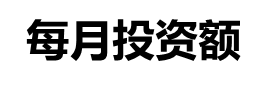

In [9]:
df_tz['总投资金额'].sum()

57064000

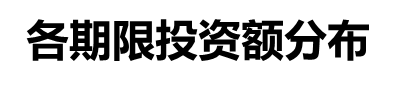

In [11]:
print(df_tz.groupby('计划名称')['总投资金额'].sum())

计划名称
新手标一月       406800
新手标三月       326600
智慧投12月    10297000
智慧投1月     22740100
智慧投3月     13508700
智慧投6月      9784800
Name: 总投资金额, dtype: int64


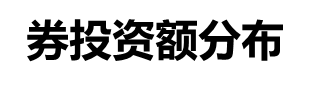

In [ ]:
df_quan.groupby()

In [14]:
df_quan.head(1)

,序号,ID,会员名,真实姓名,手机号码,所属公司,金额,利息率,成本,大类,使用状态,状态,生效时间,失效时间,创建时间,处理时间,使用时间,投标号,投标金额,冻结的匹配金额,券别名,描述,处理人,期限,一级上线,一级等级,一级部门,身份证,用户来源
0,1,968456,XJLC_6461623120790c96,金岳友,18968342668,NaN,0,1.2,1.2,加息券,投标冻结,正常,2019-07-31 00:00:00,2019-08-14 23:59:59,2019-07-31 20:26:27,2019-07-31 20:26:27,2019-07-31 20:27:14,0,0.0,200,玩转一夏（2）,砸金蛋券包,平台,180,fensi,普通,其他,332621197007222234,存管版


In [13]:
df_tz.head(1)

,用户名,真实姓名,手机号码,身份证号码,所属公司,投资时VIP等级,注册时间,计划名称,计划期限,年利率,奖励利率,总投资金额,新充金额,续投金额,预期利息,抵用券成本,加息券成本,加息标成本,投资时间,投资来源,渠道,首投时间,综合券成本,邀请渠道
0,XJLC_5244576690eedf7,龚亚飞,15869327728,330224196212311421,NaN,VIP1,2016-05-29,智慧投1月,1月,8.00%,0.00%,300,0.0,300.0,2.0,0,0.0,0.0,2019-07-31 23:52:09,安卓端,平台,2016-07-23 13:15:43,0.0,业务邀请


- 成交额

In [14]:
cheng_jiao_sum = df_tz['总投资额'].sum()
print('成交额：%.0f' %cheng_jiao_sum)

成交额：53324000


- 为用户赚取收益

In [5]:
diyong_quan_sum = df_quan[df_quan['大类']=='抵用券'].金额.sum()
xianjin_quan_sum = df_quan[df_quan['大类']=='现金券'].金额.sum()

tz_shouyi_sum = df_tz['预期收益'].sum()
yj_sum = df_yj['佣金金额'].sum()

print('投资利息（含加息标、加息券收益）{0} + 佣金{1} + 抵用券{2} + 现金券{3} = {4:.2f}'
      .format(tz_shouyi_sum,
              yj_sum,
              diyong_quan_sum,
              xianjin_quan_sum,
              tz_shouyi_sum+yj_sum+diyong_quan_sum+xianjin_quan_sum))

投资利息（含加息标、加息券收益）2679889.23 + 佣金172370.43999999997 + 抵用券16305 + 现金券741 = 2869305.67


- 平台累计总交易额

In [6]:
last = input('上月累计成交额')

print('\n平台累计总交易额：上月{0} + 本月{1} = {2}'\
      .format(float(last),cheng_jiao_sum,float(last) + cheng_jiao_sum))

上月累计成交额3098389184.03

平台累计总交易额：上月3098389184.03 + 本月53324000.0 = 3151713184.03


## 3页

- 新增用户数

In [7]:
fresh_users = df_zc['用户名'].count()

print('新增用户数：',fresh_users)

新增用户数： 1238


- 累计注册用户数

In [8]:
last_users = input('上月累计注册用户数')

print('\n平台累计注册用户数：上月{0} + 本月{1} = {2}'\
      .format(int(last_users),fresh_users,int(last_users) + fresh_users))

上月累计注册用户数261332

平台累计注册用户数：上月261332 + 本月1238 = 262570


## 4页

In [9]:
df_tz['投资来源'].unique()

array(['安卓端', '苹果端', '微信端', 'Web端', '手机H5'], dtype=object)

- 移动端投资额

In [13]:
tz_yidong_sum = df_tz[df_tz['投资来源'].isin(['安卓端', '苹果端', '微信端', '手机H5'])].总投资额.sum()

print('移动端投资额：%.0f'%tz_yidong_sum)

移动端投资额：53014800


- 比例

In [15]:
gp = df_tz.groupby('投资来源')['总投资额'].sum()

temp = pd.DataFrame(gp)

temp['total'] = cheng_jiao_sum

temp['percent'] = temp['总投资额'] / temp['total']

print('APP {0:.2%} , 微信 {1:.2%} , PC {2:.2%}'.format(
    1 - temp.loc['微信端','percent'] - temp.loc['Web端','percent'],
    temp.loc['微信端','percent'],
    temp.loc['Web端','percent']))

APP 95.53% , 微信 3.89% , PC 0.58%


In [16]:
#方法二：
dt = {'安卓端':'APP','苹果端':'APP','微信端':'微信','Web端':'PC'}

df_tz['group'] = df_tz['投资来源'].map(dt)
grouped = df_tz.groupby('group')['总投资额'].sum()

gp_pct = grouped.apply(lambda x : 100 * x / cheng_jiao_sum)
gp_pct

group
APP    95.511590
PC      0.579851
微信      3.894869
Name: 总投资额, dtype: float64

## 5页

- 月度土豪奖

In [17]:
gp_tz_1 = df_zht.groupby('手机号码')['总投资金额'].sum().sort_values(ascending=False)

phone = gp_tz_1.index[0]
num = gp_tz_1.iloc[0]

print('月度土豪奖:{0} | {1:.0f}万'.format(phone,num/10000))

月度土豪奖:13606596070 | 129万


- 月度勤恳奖

In [18]:
gp_tz_2 = df_zht.groupby('手机号码')['总投资金额'].count().sort_values(ascending=False)

phone = gp_tz_2.index[0]
num = gp_tz_2.iloc[0]

print('月度勤恳奖:{0} | {1}次'.format(phone,num))

月度勤恳奖:13056856785 | 48次


- 月度收获奖

In [19]:
df_zht['profit'] = df_zht['预期利息']+df_zht['抵用券成本']

gp_tz_3 = df_zht.groupby('手机号码')['profit'].sum().sort_values(ascending=False)

phone = gp_tz_3.index[0]
num = gp_tz_3.iloc[0]

print('月度收获奖:{0} | {1:.0f}万'.format(phone,num/10000))

月度收获奖:13777157617 | 6万


- 月度人气奖

In [20]:
gp_zc_1 = df_zc.groupby('邀请人')['用户名'].count().sort_values(ascending=False)

phone = gp_zc_1.index[0]
num = gp_zc_1.iloc[0]

print('月度人气奖:{0:.0f} | {1}人'.format(phone,num))

月度人气奖:13567444503 | 132人


## 6页

- “壕”气冲天

In [21]:
gp_tz_4 = df_tz.groupby('投资时会员类型')['总投资额'].sum()
# print(gp_tz_4)

gp_tz_5 = df_tz.groupby('投资时会员类型')['投资用户'].nunique()
# print(gp_tz_5)

gp_tz_6 = pd.concat([gp_tz_4, gp_tz_5], axis=1)
gp_tz_6['avg'] = gp_tz_6['总投资额'] / gp_tz_6['投资用户']
gp_tz_6.sort_values(by = 'avg',ascending = False,inplace = True)

vip = gp_tz_6.index[0]
num = gp_tz_6.iloc[0,2]

print('“壕”气冲天:{0} | {1:.0f}万'.format(vip,num/10000))

“壕”气冲天:VIP6 | 23万


- “勇”争先锋

In [22]:
gp_tz_4.sort_values(ascending = False,inplace = True)

vip = gp_tz_4.index[0]
num = gp_tz_4.iloc[0]

print('“勇”争先锋:{0} | {1:.0f}万'.format(vip,num/10000))

“勇”争先锋:VIP2 | 1343万


- VIP用户升级情况

In [23]:
df_vip_up = df_vip[df_vip['变动原因'] == '升级']
# df_vip_up['变动原因'].unique()

df_vip_up.sort_values(by = '变动后等级',ascending = False,inplace = True)
df_vip_up.drop_duplicates(subset=['用户名'],inplace = True)

# df_vip_up.info()
gp_vip = df_vip_up.groupby('变动后等级')['用户名'].count()
gp_vip.index.name = 'VIP 升级人数' 

print('{0}位用户的VIP等级提升，其中：\n'.format(gp_vip.sum()))
gp_vip

263位用户的VIP等级提升，其中：



c:\users\dragon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\dragon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


VIP 升级人数
1    104
2     78
3     45
4     19
5     15
6      2
Name: 用户名, dtype: int64